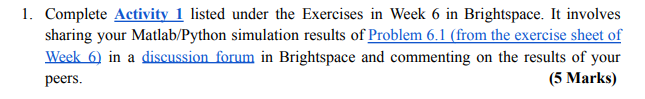

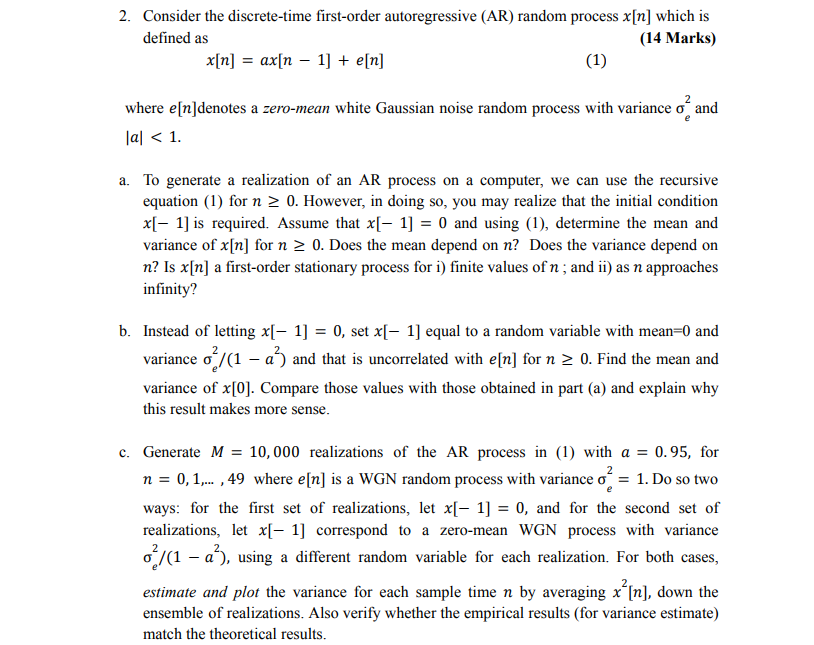
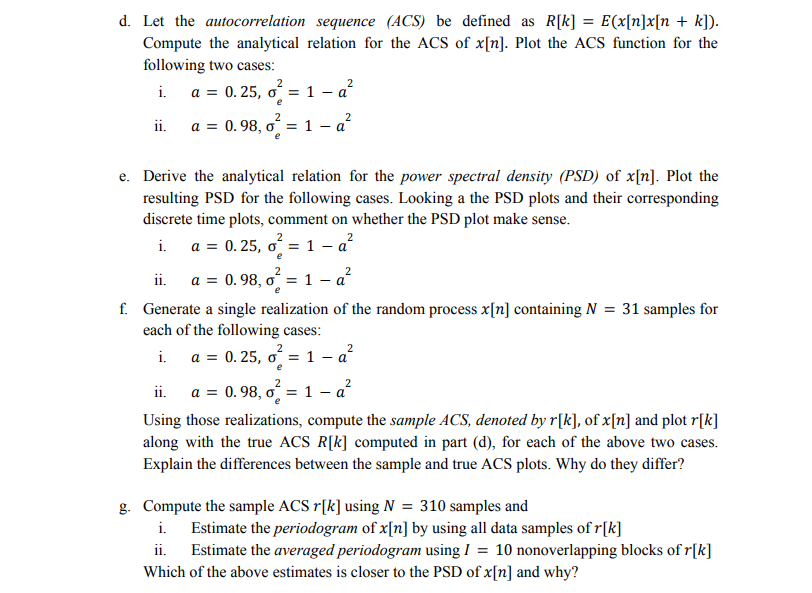

## A)


The AR(1) process $x_n=ax_{n-1}+e_n$ is stationary with $\mu_x=0$ and $\sigma_x^2=\frac{\sigma^2_e}{1-a^2}$

At $n=0$ we have the mean value

$$
\mathbb{E}[x_n]=a\mathbb{E}[x_{n-1}]+\mathbb{E}[e_n]=a*0+0=0
$$

The variance is

$$
Var(x_n)=a^2Var(x_{n-1})+Var(e_n)=a^2*0+\sigma_e^2=\sigma_e^2
$$

As n grows, so will the variance converge to towards the final value $\sigma_x^2=\frac{\sigma^2_e}{1-a^2}$. The mean will remain constant which can be calculated by recursion.

$x_n$ is first order stationary for finite value of n and for infinite since the mean does not depend on $n$. Howver, the process is not second order stationary, since the variance depends on time, when n is finite. As n grows to inifinty, the initial condition will disappear(since $|a|<1$).  

### B)

Now when $x_{-1}$ has mean 0 and $Var(x_{-1})=\frac{\sigma^2_e}{1-a^2}$ we can calculate the variance again.

We know that for an AR(1) process $Var(\sigma_x)=\frac{\sigma^2_e}{1-a^2}$ and since the process is stationary $Var(x_n)=Var(x_{n-1})$

$$
Var(x_n)=a^2Var(x_{n-1})+Var(e_n)=a^2Var(x_{n})+Var(e_n)
$$

Then we solve for $Var(x_n)$

$$
Var(x_n)(1-a^2)=Var(e_n)
$$

$$
Var(x_n)=\frac{Var(e_n)}{(1-a^2)}=\frac{\sigma^2_e}{1-a^2}
$$

It makes more sense to initialize the process with a random variable which has the same mean and variance as the process itself.

### C)

In [1]:
def ar_one(w, phi, init=0):

    x = np.zeros_like(w)

    x[0] = init
    
    for i in range(1, len(w)):
        x[i] = phi * x[i-1] + w[i]
    return x

Text(0.5, 0, 'Samples [n]')

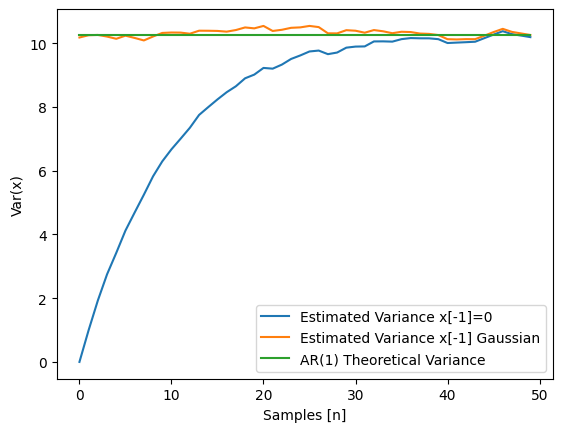

In [2]:
import numpy as np
import matplotlib.pyplot as plt

realizations = 10000

mu_e = 0
var_e = 1

a = 0.95

theoretical_var = 1 / (1-a**2) 

N = 50

x_init_0 = []
x_init_var = []

for r in range(realizations):
    w = np.random.normal(0, 1, N)
    x_init_0 += [ar_one(w, a, init=0)]
    x_init_var += [ar_one(w, a, init=np.random.normal(0, np.sqrt(theoretical_var)))]

x_init_0 = np.vstack(x_init_0)
x_init_var = np.vstack(x_init_var)

var_x_init_0 = np.mean(x_init_0**2, axis=0)
var_x_init_var = np.mean(x_init_var**2, axis=0)

plt.figure()
plt.plot(var_x_init_0, label="Estimated Variance x[-1]=0")
plt.plot(var_x_init_var, label="Estimated Variance x[-1] Gaussian")
plt.plot(np.arange(N), np.ones(N)*theoretical_var, label="AR(1) Theoretical Variance")
plt.legend()
plt.ylabel("Var(x)")
plt.xlabel("Samples [n]")

As seen on the plot, the empirical results matches the theoretical results.

### D)

The autocorrelation sequence is defined as $R_x(k)=\mathbb{E}[x_nx_{n+k}]$

$$
R_x(k)=\mathbb{E}[x_nx_{n+k}]=\mathbb{E}[(aX_{n-1}+e_n)x_{n+k}]=a\mathbb{E}[X_{n-1}x_{n+k}]+\mathbb{E}[e_nx_{n+k}]
$$

When $k \leq 1$ then $\mathbb{E}[e_nx_{n+k}]=0$ since the past values of $x_{n-k}$ is uncorrelated with the present noise term $e_n$

We define $R_{k-1}=\mathbb{E}[X_{n-1}x_{n+k}]$ for $k \leq 1$

$$
R_x(k)=\mathbb{E}[x_nx_{n+k}]=a\mathbb{E}[X_{n-1}x_{n+k}]=aR_x(k-1)
$$

By definition $R_x(0)=1$, hence we can compute the values of the autocorrelation sequence using $R_x(k)=R_x(0)a^{|k|}=a^{|k|}$ since the autocorrelation i symmetric around $k=0$.


Text(0.5, 1.0, 'Autocorrelation')

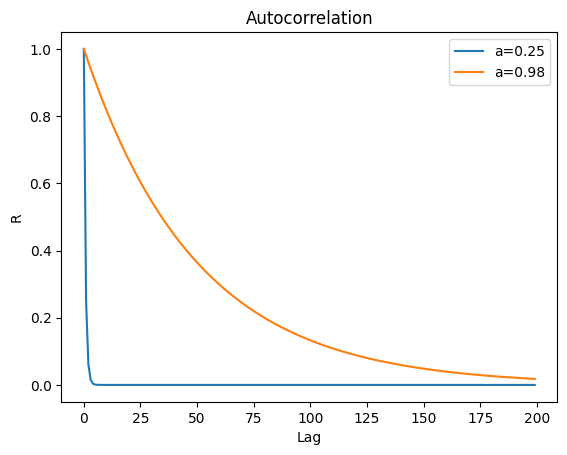

In [3]:
a_s = [0.25, 0.98]
num_lags = 200

plt.figure()
for a in a_s:

    acorr = [a**n for n in range(num_lags)]
    plt.plot(acorr, label=f"a={a}")

plt.legend()
plt.xlabel("Lag")
plt.ylabel("R")
plt.title("Autocorrelation")

### E)

The PSD for a discrete random process is the Fourier transform of the autocorrelation sequence, where we can substitute the expression found for $R_x(k)$

$$
S_x(\omega)=\sum_{k=-\infty}^\infty R_x(k)e^{-j \omega k}=a^{|k|}e^{-j \omega k}
$$

This can be simplified to 

$$
S_x(\omega)=\frac{\sigma_e^2}{1-2 a cos(\omega)+a^2}
$$

For $-\pi \leq \omega \leq \pi$



Text(0, 0.5, 'PSD Magnitude')

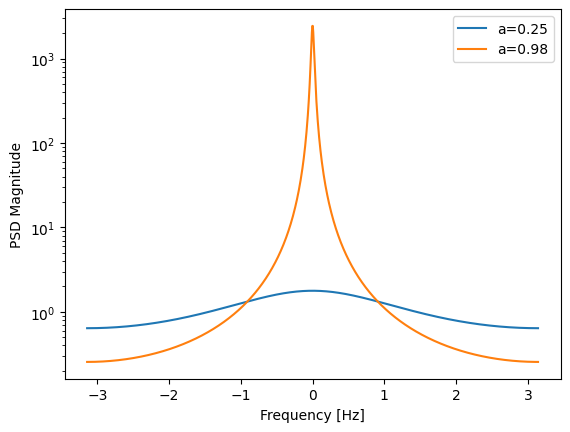

In [4]:
plt.figure()
for a in [0.25, 0.98]:
   
    omega = np.linspace(-np.pi, np.pi, 1000)
    s_x = 1/(1-2*a*np.cos(omega)+a**2)

    plt.plot(omega, s_x, label=f"a={a}")
plt.yscale("log")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD Magnitude")

It makes sense that a low vale $a$ will produce a flatter PSD, since the process is more influence by new samples from $e_n$ which has a flat spectrum. 
On the other hand if $a$ is close to 1 it means a slowly changing process resulting in dampening of the higher frequencies.

### F)

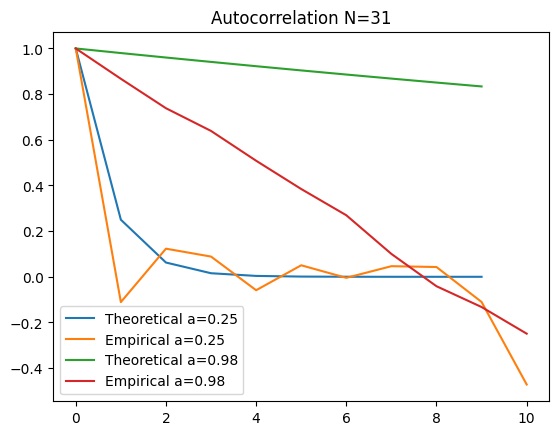

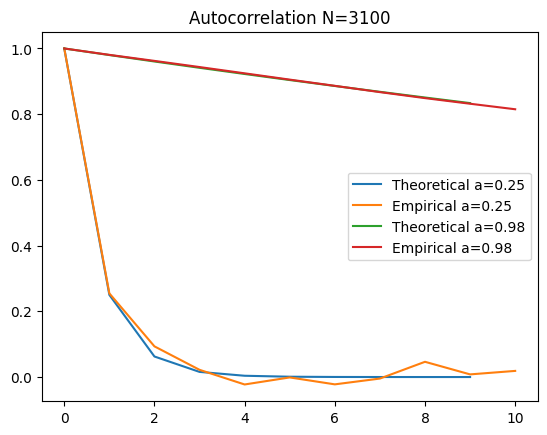

In [5]:
from statsmodels.tsa.stattools import acf

for N in [31, 3100]:
    
    num_lags = 10
    
    plt.figure()
    for a in a_s:
    
        theoretical_acorr = [a**n for n in range(num_lags)]
        
    
        w = np.random.normal(0, 1, N)
        x = ar_one(w, a, init=0)
    
        empirical_acorr = acf(x, nlags=num_lags)
    
        plt.plot(theoretical_acorr, label=f"Theoretical a={a}")
        plt.plot(empirical_acorr, label=f"Empirical a={a}")
        #plt.plot(np.arange(num_lags), np.ones(num_lags)*1.96/np.sqrt(N), color="black")
        #plt.plot(np.arange(num_lags), np.ones(num_lags)*-1.96/np.sqrt(N), color="black")
    plt.title(f"Autocorrelation N={N}")
    plt.legend()

The empirical autocorrelation is different from the theoretical because N is low and we only have a single realization. As N increases, the empirical autocorrelation will converge towards the theoretical autocorrelation. Another approach would be to calculate the average autocorrelation over several realizations.

### G)

block_len: 38, num_blocks: 8
block_len: 38, num_blocks: 8


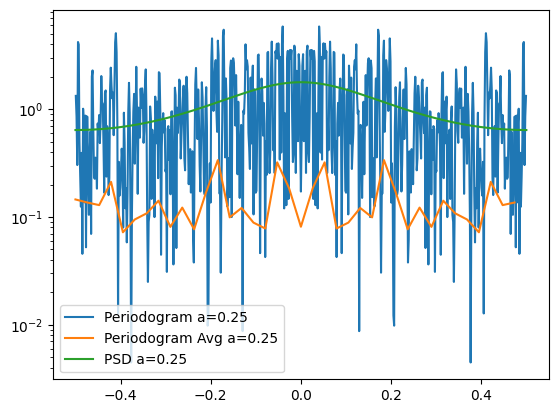

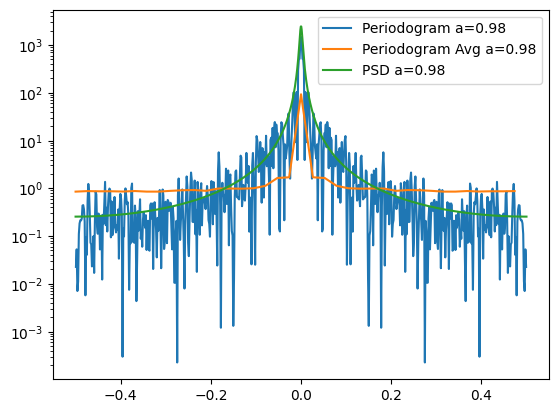

In [6]:
num_blocks = 8

N = 310


for a in a_s:
    plt.figure()    
    w = np.random.normal(0, 1, N)
    x = ar_one(w, a, init=0)

    block_len = N // num_blocks

    print(f"block_len: {block_len}, num_blocks: {num_blocks}")
    
    raw_acov = np.correlate(x, x, mode='full')
    # Normalize to get autocorrelation
    acov  = raw_acov  / N#raw_acov[N-1]

    acov  = np.roll(acov , N)   
    acov_blocks = np.vstack([acov[n*block_len:(n+1)*block_len] for n in range(num_blocks)])#acov[:num_blocks*block_len].reshape(num_blocks, block_len)

    t = np.linspace(-0.5, 0.5, 1000)
    s_x = 1/(1-2*a*np.cos(2*np.pi*t)+a**2)
    
    periodogram = np.real(np.fft.fft(acov))
    periodogram_freqs = np.fft.fftfreq(len(acov))
    periodogram_blocks = np.real(np.fft.fft(acov_blocks, axis=1))
    periodogram_mean = np.mean(periodogram_blocks, axis=0)
    periodogram_mean_freqs = np.fft.fftfreq(acov_blocks.shape[1])
    
    plt.plot(np.fft.fftshift(periodogram_freqs), np.fft.fftshift(periodogram), label=f"Periodogram a={a}")
    plt.plot(np.fft.fftshift(periodogram_mean_freqs), np.fft.fftshift(periodogram_mean), label=f"Periodogram Avg a={a}")
    plt.plot(t, s_x, label=f"PSD a={a}")
    plt.yscale("log")
    plt.legend()

I doubt that my results are correct. I expect that the average of the non-overlapping blocks will give me a better estimate, howver that is not what i see here.

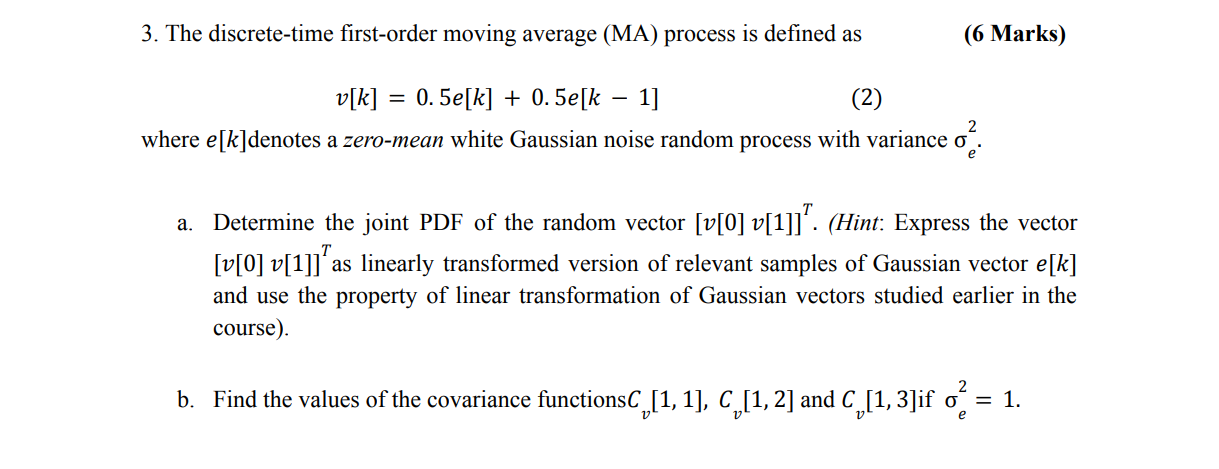
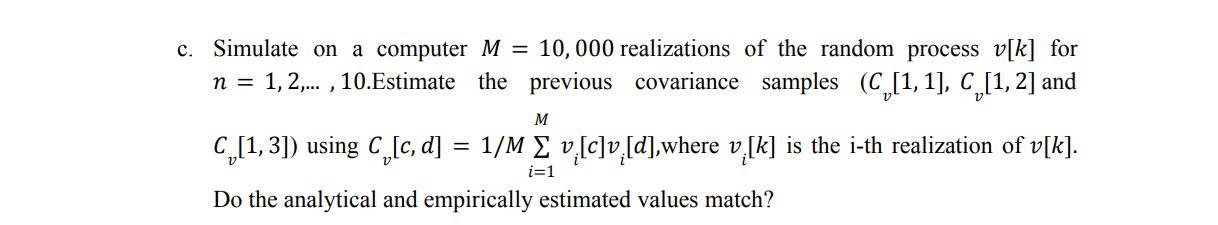

### A)

To determine the PDF of the vector $[v_0, v_{1}]^T$ the noise vector $[e_0, e_{-1}, e_{-2}]^R$ is transformed as

$$
L=\begin{bmatrix}
v_0 \\
v_1
\end{bmatrix}
=
A
\begin{bmatrix}
e_0 \\[4pt]
e_1 \\
e_2
\end{bmatrix}
$$

Where 
$$
A=\begin{bmatrix}
\frac{1}{2} & \frac{1}{2} & 0 \\
0 & \frac{1}{2} & \frac{1}{2}
\end{bmatrix}
$$

We transform the Covariance matrix for the noise vector to get the joint PDF of $[v_0, v_{1}]^T$. Since $e$ is uncorrelated noise, the covaraiance matrix $Cov_e$ is the identity matrix. We have a zero mean vector, so the transformed mean vector is also zero.

$$
Cov_L=A Cov_e A^T =
\begin{bmatrix}
\frac{1}{2} & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{2}
\end{bmatrix}
$$

The joint PDF is then $$L \sim N([0, 0]^T, Cov_L)$$



### B)

Now we define 

$$
L=
\begin{bmatrix}
v_0 \\
v_1 \\
v_2
\end{bmatrix}
=
A
\begin{bmatrix}
e_0 \\[4pt]
e_1 \\
e_2 \\
e_3
\end{bmatrix}
$$

Where 

$$
A=
\begin{bmatrix}
\frac{1}{2} & \frac{1}{2} & 0 & 0 \\
0 & \frac{1}{2} & \frac{1}{2} & 0 \\
0 & 0 & \frac{1}{2} & \frac{1}{2}
\end{bmatrix}
$$

The transformation then becomes

$$
Cov_L=ACov_eA^T=
\begin{bmatrix}
\frac{1}{2} & \frac{1}{4} & 0 \\
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\
0 & \frac{1}{4} & \frac{1}{2}
\end{bmatrix}
$$

And we can read $C_v[1,1]=0.5$, $C_v[1,2]=0.25$ and $C_v[1,2]=0$ from the matrix.


### C)

The simulation below yields $C_v[1,1]=0.505$, $C_v[1,2]=0.250$ and $C_v[1,2]=-0.000$ which is very close to the analytical results.

In [33]:
def ma_process(w):
    x = np.zeros_like(w)
    
    for i in range(1, len(w)):
        x[i] = 0.5*w[i] + 0.5*w[i-1]

    return x

num_realizations = 10000

v_ = []

for n in range(num_realizations):
    w = np.random.normal(0, 1, 10)
    v = ma_process(w)
    v_ += [v.reshape(1,-1)]

v_ = np.vstack(v_)

for d in range(1, 4):
    cov = 0
    for i in range(num_realizations):
        cov += v_[i, 1] * v_[i, d]
    cov = cov / num_realizations

    print(f"Cov(1,{d})={cov:.3f}")
    


Cov(1,1)=0.504
Cov(1,2)=0.250
Cov(1,3)=-0.000
